<a href="https://colab.research.google.com/github/yweslakarep123/Engineering-Graduate-Salary-Prediction/blob/main/Engineering_Graduate_Salary_Prediction_Regressi.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive

In [2]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content'

In [9]:
!chmod 600 /content/kaggle.json

In [ ]:
!kaggle datasets download -d manishkc06/engineering-graduate-salary-prediction

100% 172k/172k [00:00<00:00, 480kB/s]
100% 172k/172k [00:00<00:00, 479kB/s]


In [10]:
!pip install patool pyunpack

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.6/94.6 kB 2.6 MB/s eta 0:00:00


In [11]:
from pyunpack import Archive
zip_file_path = '/content/engineering-graduate-salary-prediction.zip'
extract_directory = '/content/drive/MyDrive/Test_dataset'
# Buka dan ekstrak file ZIP menggunakan patool
Archive(zip_file_path).extractall(extract_directory)

# Output pesan jika ekstraksi selesai
print("Ekstraksi selesai.")

Ekstraksi selesai.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('/content/drive/MyDrive/Test_dataset/Engineering_graduate_salary.csv')

In [5]:
df.head()

,ID,Gender,DOB,10percentage,10board,12graduation,12percentage,12board,CollegeID,CollegeTier,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,604399,f,1990-10-22,87.80,cbse,2009,84.00,cbse,6920,1,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,988334,m,1990-05-15,57.00,cbse,2010,64.50,cbse,6624,2,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,301647,m,1989-08-21,77.33,"maharashtra state board,pune",2007,85.17,amravati divisional board,9084,2,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,582313,m,1991-05-04,84.30,cbse,2009,86.00,cbse,8195,1,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,339001,f,1990-10-30,82.00,cbse,2008,75.00,cbse,4889,2,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [6]:
df.shape

(2998, 34)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2998 entries, 0 to 2997
Data columns (total 34 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     2998 non-null   int64  
 1   Gender                 2998 non-null   object 
 2   DOB                    2998 non-null   object 
 3   10percentage           2998 non-null   float64
 4   10board                2998 non-null   object 
 5   12graduation           2998 non-null   int64  
 6   12percentage           2998 non-null   float64
 7   12board                2998 non-null   object 
 8   CollegeID              2998 non-null   int64  
 9   CollegeTier            2998 non-null   int64  
 10  Degree                 2998 non-null   object 
 11  Specialization         2998 non-null   object 
 12  collegeGPA             2998 non-null   float64
 13  CollegeCityID          2998 non-null   int64  
 14  CollegeCityTier        2998 non-null   int64  
 15  Coll

In [8]:
df.drop(['DOB','ID','CollegeID','12graduation','12board','CollegeID','10board','CollegeCityID','CollegeCityTier','GraduationYear'], axis=1, inplace=True)

In [9]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,Delhi,650,665,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,Uttar Pradesh,440,435,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,Maharashtra,485,475,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,Delhi,675,620,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,Tamil Nadu,575,495,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [10]:
df = df.drop_duplicates()

In [11]:
df.shape

(2998, 25)

In [13]:
df.describe()

,10percentage,12percentage,CollegeTier,collegeGPA,English,Logical,Quant,Domain,ComputerProgramming,ElectronicsAndSemicon,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
count,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,...,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2998.000000,2.998000e+03
mean,77.666264,74.341061,1.924616,71.509857,501.066378,500.431621,514.137759,0.508458,351.868579,96.228152,...,24.138759,16.267845,31.068379,1.946965,-0.038714,0.126217,-0.008662,-0.145965,-0.141111,3.051748e+05
std,10.002785,11.120299,0.264053,8.122462,105.304512,87.299850,122.194955,0.463373,204.526227,158.737747,...,99.785138,86.054739,103.552963,32.241501,1.024974,0.955831,0.962695,1.012901,1.007134,2.123312e+05
min,43.000000,40.000000,1.000000,6.630000,180.000000,195.000000,120.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-3.893300,-5.781600,-4.600900,-2.643000,-7.375700,3.500000e+04
25%,71.140000,66.000000,2.000000,66.530000,425.000000,441.250000,430.000000,0.342315,295.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-0.649100,-0.435300,-0.604800,-0.868200,-0.669200,1.800000e+05
50%,78.965000,74.000000,2.000000,71.800000,500.000000,505.000000,515.000000,0.622643,415.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.046400,0.212400,0.091400,-0.172700,-0.094300,3.000000e+05
75%,85.600000,82.600000,2.000000,76.300000,570.000000,565.000000,595.000000,0.835612,495.000000,233.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,0.702700,0.812800,0.672000,0.526200,0.502400,3.700000e+05
max,97.760000,98.700000,2.000000,99.930000,875.000000,795.000000,900.000000,0.999910,804.000000,612.000000,...,623.000000,660.000000,548.000000,500.000000,1.995300,1.904800,2.161700,3.352500,1.630200,4.000000e+06


In [14]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,Delhi,650,665,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,Uttar Pradesh,440,435,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,Maharashtra,485,475,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,Delhi,675,620,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,Tamil Nadu,575,495,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [15]:
df.Degree.unique()

array(['B.Tech/B.E.', 'M.Tech./M.E.', 'MCA', 'M.Sc. (Tech.)'],
      dtype=object)

In [ ]:
df.Specialization.unique()

In [18]:
df.Specialization.value_counts(ascending=False)

electronics and communication engineering      670
computer science & engineering                 557
information technology                         506
computer engineering                           415
computer application                           201
mechanical engineering                         155
electronics and electrical engineering         148
electronics & telecommunications                89
electrical engineering                          63
electronics & instrumentation eng               24
instrumentation and control engineering         18
information science engineering                 18
electronics and instrumentation engineering     18
civil engineering                               15
electronics engineering                         13
biotechnology                                   12
other                                           10
industrial & production engineering              8
chemical engineering                             7
applied electronics and instrum

In [19]:
spesialisasi = df.Specialization.value_counts(ascending=False)
spesialisasi_less10 = spesialisasi[spesialisasi<=10]

In [20]:
def clean_spe(val):
  if val in spesialisasi_less10:
    return 'other'
  else:
    return val

df.Specialization = df.Specialization.apply(clean_spe)
df.Specialization.unique()

array(['instrumentation and control engineering',
       'computer science & engineering',
       'electronics & telecommunications', 'biotechnology',
       'mechanical engineering', 'information technology',
       'electronics and communication engineering',
       'computer engineering', 'computer application', 'other',
       'electrical engineering', 'electronics and electrical engineering',
       'information science engineering',
       'electronics & instrumentation eng', 'electronics engineering',
       'electronics and instrumentation engineering', 'civil engineering'],
      dtype=object)

In [21]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,Delhi,650,665,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,Uttar Pradesh,440,435,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,Maharashtra,485,475,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,Delhi,675,620,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,Tamil Nadu,575,495,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [22]:
df.index

Int64Index([   0,    1,    2,    3,    4,    5,    6,    7,    8,    9,
            ...
            2988, 2989, 2990, 2991, 2992, 2993, 2994, 2995, 2996, 2997],
           dtype='int64', length=2998)

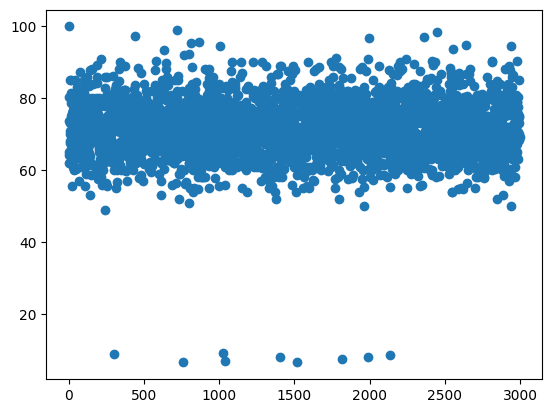

In [23]:
plt.scatter(df.index, df['collegeGPA'])

In [24]:
df = df[(df['collegeGPA']>40)]
df.shape

(2989, 25)

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2989 entries, 0 to 2997
Data columns (total 25 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Gender                 2989 non-null   object 
 1   10percentage           2989 non-null   float64
 2   12percentage           2989 non-null   float64
 3   CollegeTier            2989 non-null   int64  
 4   Degree                 2989 non-null   object 
 5   Specialization         2989 non-null   object 
 6   collegeGPA             2989 non-null   float64
 7   CollegeState           2989 non-null   object 
 8   English                2989 non-null   int64  
 9   Logical                2989 non-null   int64  
 10  Quant                  2989 non-null   int64  
 11  Domain                 2989 non-null   float64
 12  ComputerProgramming    2989 non-null   int64  
 13  ElectronicsAndSemicon  2989 non-null   int64  
 14  ComputerScience        2989 non-null   int64  
 15  Mech

In [27]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,CollegeState,English,Logical,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,Delhi,650,665,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,Uttar Pradesh,440,435,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,Maharashtra,485,475,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,Delhi,675,620,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,Tamil Nadu,575,495,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [29]:
df.drop(['CollegeState'], axis=1, inplace=True)

<ipython-input-29-585b6b8249c8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(['CollegeState'], axis=1, inplace=True)


In [30]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,-1,-1,-1,-1,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,-1,-1,-1,-1,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,-1,-1,260,-1,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,-1,-1,-1,-1,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,-1,-1,-1,-1,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


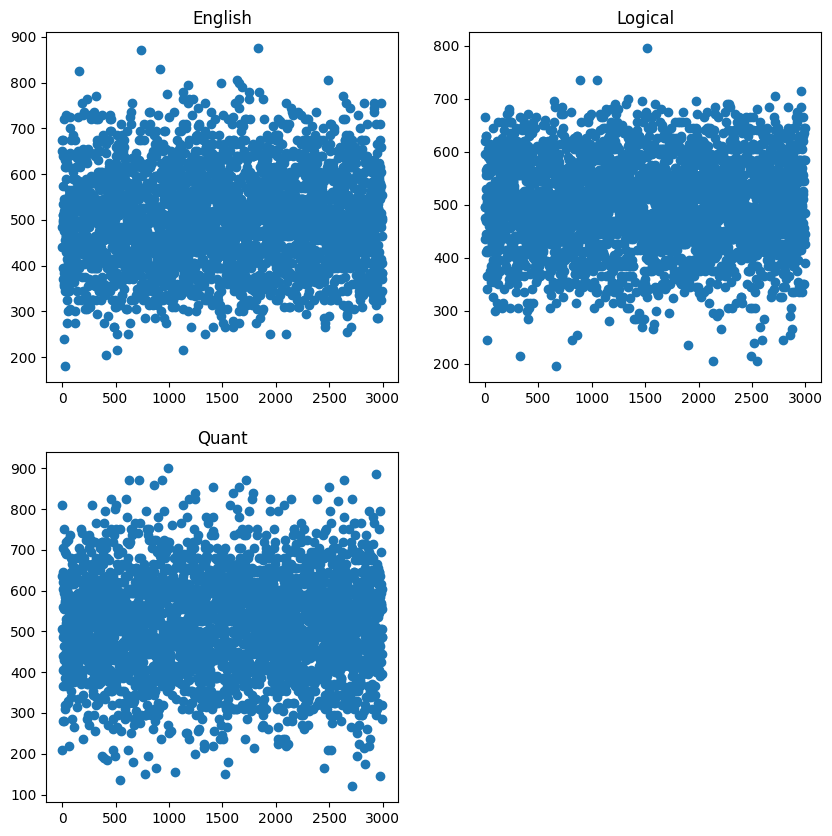

In [34]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(df.index, df['English'])
plt.title('English')

plt.subplot(2,2,2)
plt.scatter(df.index, df['Logical'])
plt.title('Logical')

plt.subplot(2,2,3)
plt.scatter(df.index, df['Quant'])
plt.title('Quant')

plt.show()

In [36]:
df.columns

Index(['Gender', '10percentage', '12percentage', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'English', 'Logical', 'Quant', 'Domain',
       'ComputerProgramming', 'ElectronicsAndSemicon', 'ComputerScience',
       'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg', 'CivilEngg',
       'conscientiousness', 'agreeableness', 'extraversion', 'nueroticism',
       'openess_to_experience', 'Salary'],
      dtype='object')

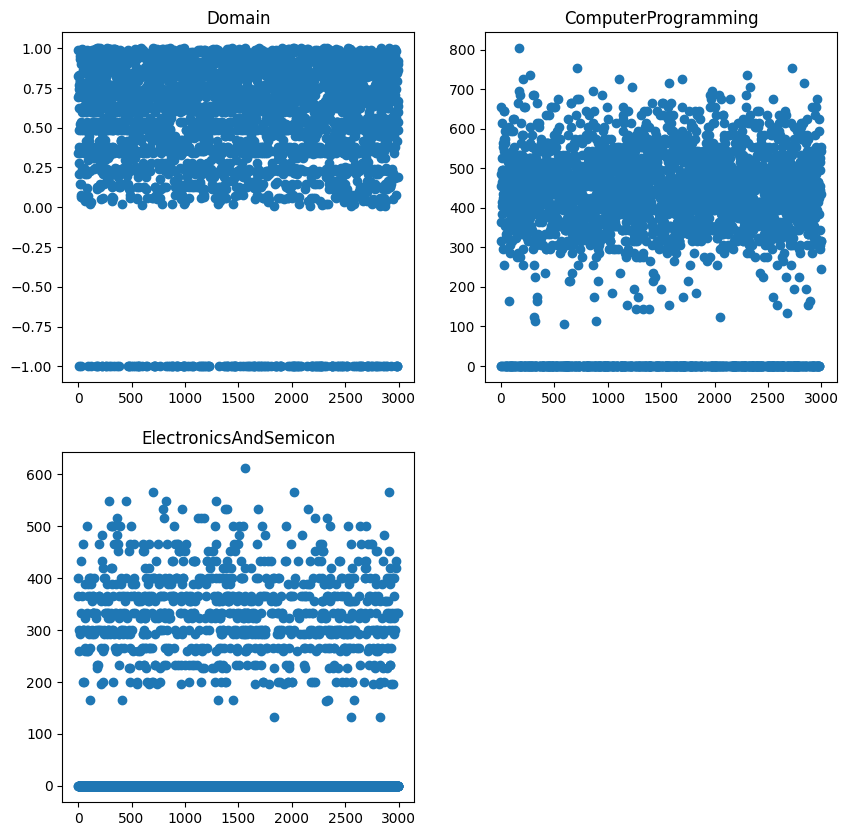

In [37]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(df.index, df['Domain'])
plt.title('Domain')

plt.subplot(2,2,2)
plt.scatter(df.index, df['ComputerProgramming'])
plt.title('ComputerProgramming')

plt.subplot(2,2,3)
plt.scatter(df.index, df['ElectronicsAndSemicon'])
plt.title('ElectronicsAndSemicon')

plt.show()

In [38]:
df = df.replace(-1,np.nan)

In [39]:
cols_nan = [column for column in df.columns if df.isna().sum()[column] > 0]
for column in cols_nan:
  df[column] = df[column].fillna(df[column].mean())

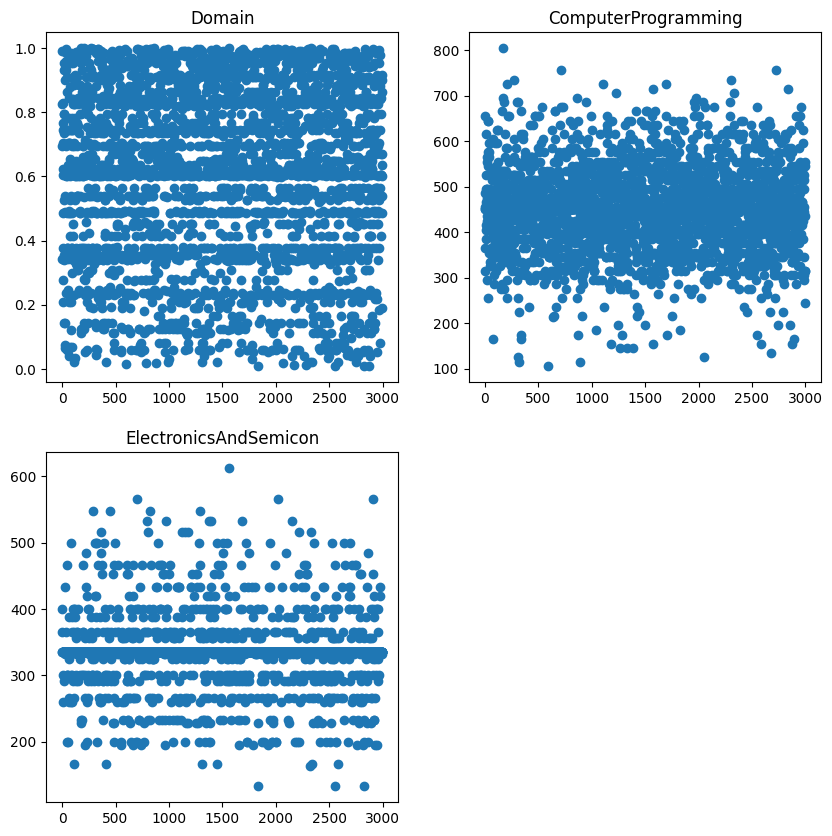

In [40]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.scatter(df.index, df['Domain'])
plt.title('Domain')

plt.subplot(2,2,2)
plt.scatter(df.index, df['ComputerProgramming'])
plt.title('ComputerProgramming')

plt.subplot(2,2,3)
plt.scatter(df.index, df['ElectronicsAndSemicon'])
plt.title('ElectronicsAndSemicon')

plt.show()

In [41]:
df.shape

(2989, 24)

In [42]:
df.head()

,Gender,10percentage,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,87.80,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,57.00,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,77.33,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,84.30,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,82.00,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


<Axes: xlabel='count', ylabel='Gender'>

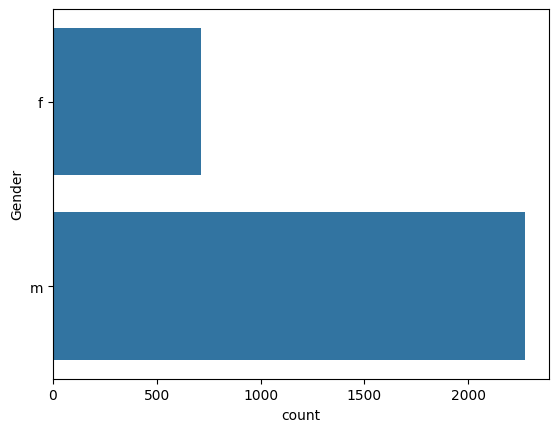

In [44]:
sns.countplot(df.Gender)

<Axes: xlabel='10percentage', ylabel='12percentage'>

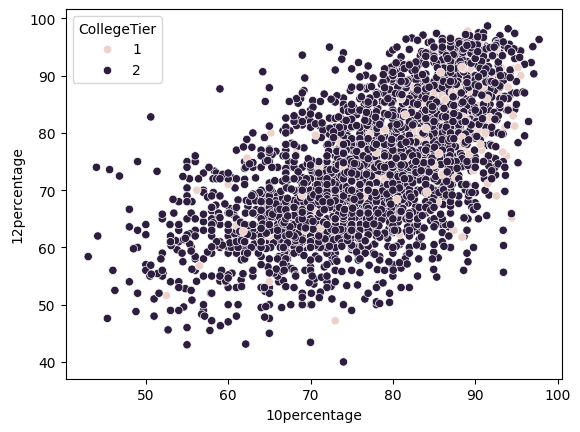

In [49]:
sns.scatterplot(x=df['10percentage'],y=df['12percentage'],hue=df['CollegeTier'])

In [50]:
df.drop(['10percentage'], axis=1, inplace=True)

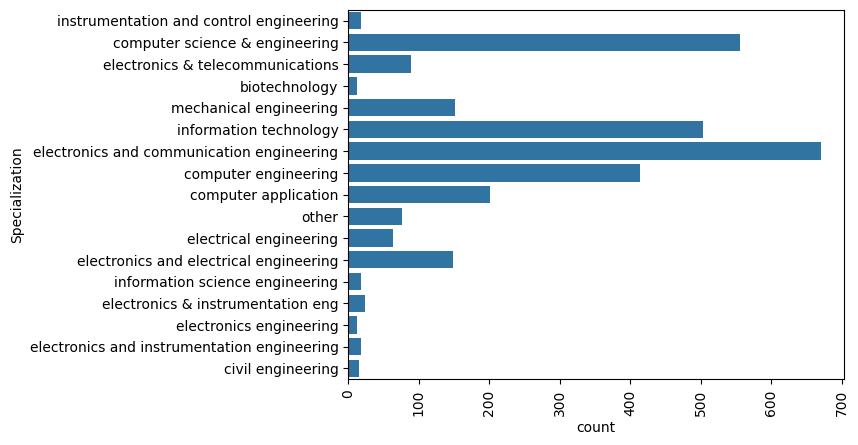

In [52]:
sns.countplot(df.Specialization)
plt.xticks(rotation=90)
plt.show()

In [53]:
df.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,0.694479,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,0.342315,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,0.824666,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,0.990009,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,0.278457,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


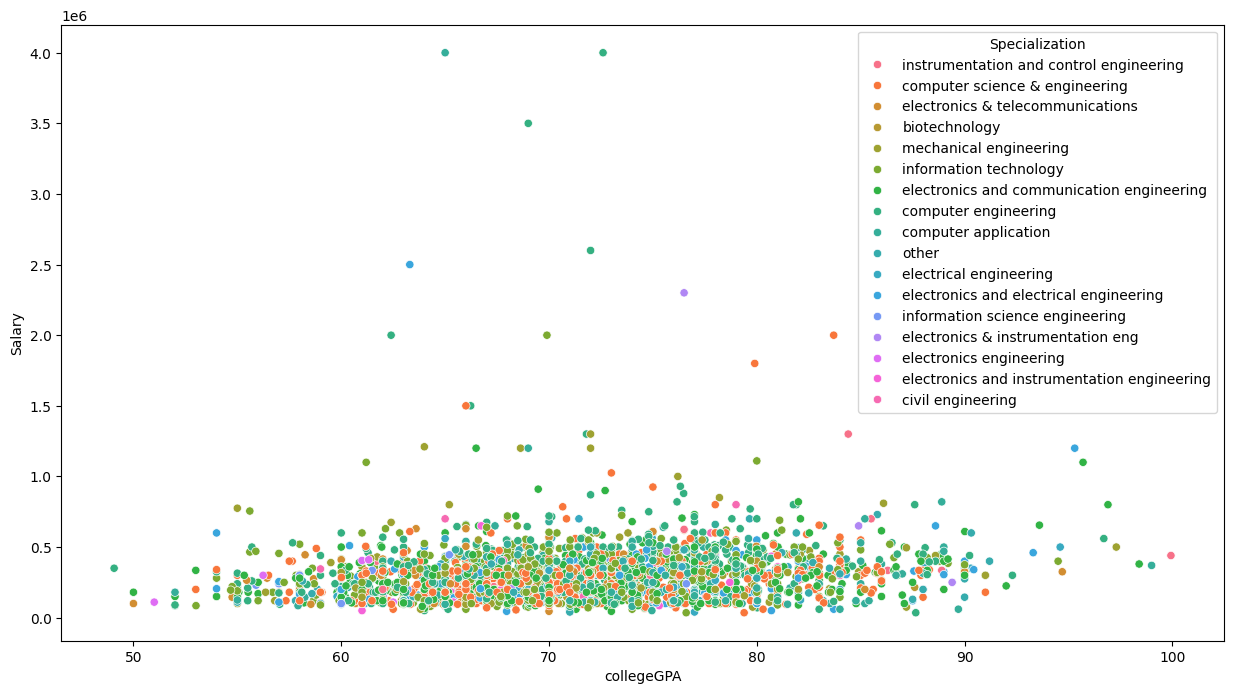

In [56]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['collegeGPA'],y=df['Salary'],hue=df['Specialization'])
plt.show()

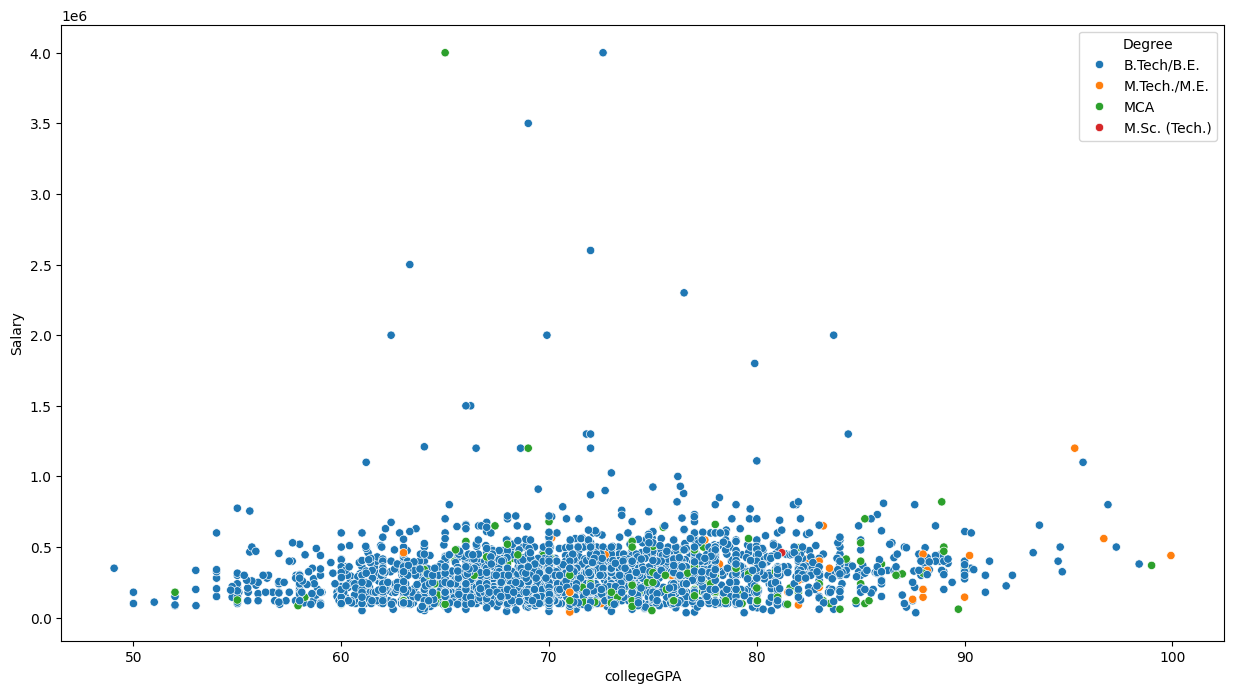

In [58]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['collegeGPA'],y=df['Salary'],hue=df['Degree'])
plt.show()

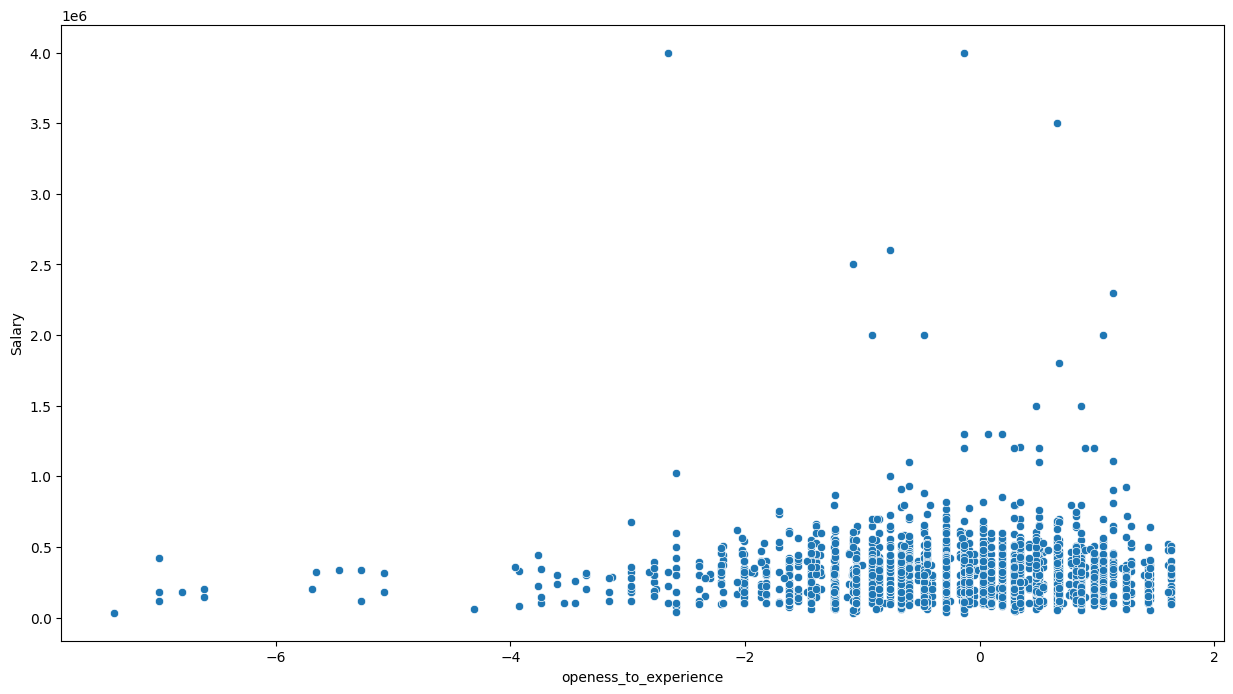

In [60]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['openess_to_experience'],y=df['Salary'])
plt.show()

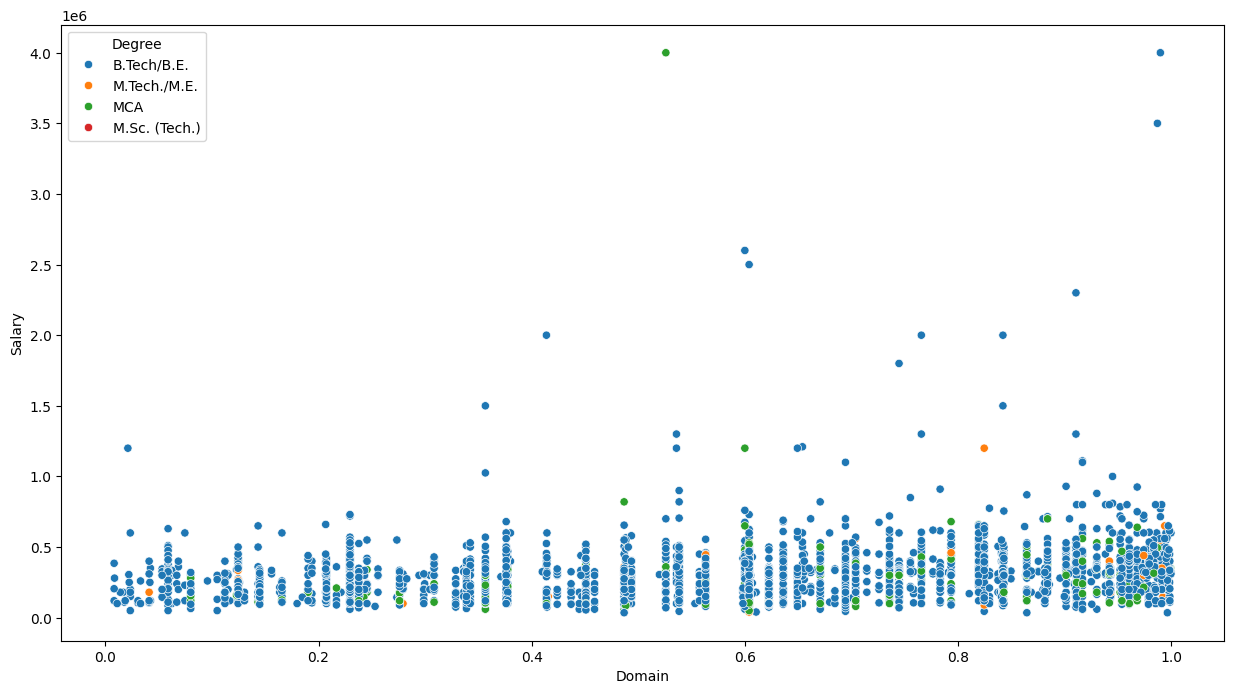

In [61]:
plt.figure(figsize=(15,8))
sns.scatterplot(x=df['Domain'],y=df['Salary'], hue=df['Degree'])
plt.show()

<ipython-input-62-aa4f4450a243>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr())


<Axes: >

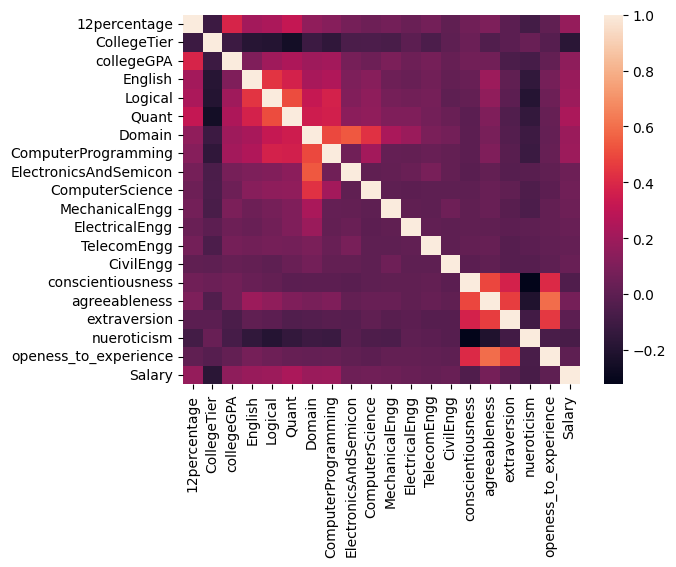

In [62]:
sns.heatmap(df.corr())

In [65]:
df.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,f,84.00,1,B.Tech/B.E.,instrumentation and control engineering,73.82,650,665,810,0.694479,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,m,64.50,2,B.Tech/B.E.,computer science & engineering,65.00,440,435,210,0.342315,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,m,85.17,2,B.Tech/B.E.,electronics & telecommunications,61.94,485,475,505,0.824666,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,m,86.00,1,B.Tech/B.E.,computer science & engineering,80.40,675,620,635,0.990009,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,f,75.00,2,B.Tech/B.E.,biotechnology,64.30,575,495,365,0.278457,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [70]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [71]:
df.Gender = encoder.fit_transform(df.Gender)
df.Degree = encoder.fit_transform(df.Degree)
df.Specialization = encoder.fit_transform(df.Specialization)

df.head()

,Gender,12percentage,CollegeTier,Degree,Specialization,collegeGPA,English,Logical,Quant,Domain,...,MechanicalEngg,ElectricalEngg,TelecomEngg,CivilEngg,conscientiousness,agreeableness,extraversion,nueroticism,openess_to_experience,Salary
0,0,84.00,1,0,14,73.82,650,665,810,0.694479,...,401.174863,423.336066,349.879562,341.96,-0.1590,0.3789,1.2396,0.14590,0.2889,445000
1,1,64.50,2,0,4,65.00,440,435,210,0.342315,...,401.174863,423.336066,349.879562,341.96,1.1336,0.0459,1.2396,0.52620,-0.2859,110000
2,1,85.17,2,0,7,61.94,485,475,505,0.824666,...,401.174863,423.336066,260.000000,341.96,0.5100,-0.1232,1.5428,-0.29020,-0.2875,255000
3,1,86.00,1,0,4,80.40,675,620,635,0.990009,...,401.174863,423.336066,349.879562,341.96,-0.4463,0.2124,0.3174,0.27270,0.4805,420000
4,0,75.00,2,0,0,64.30,575,495,365,0.278457,...,401.174863,423.336066,349.879562,341.96,-1.4992,-0.7473,-1.0697,0.06223,0.1864,200000


In [73]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

scaler = StandardScaler()

In [74]:
x = df.drop(['Salary'], axis=1)
y = df.Salary

x = scaler.fit_transform(x)

In [75]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,shuffle=True,random_state=0)

In [76]:
from xgboost import XGBRegressor
xgb = XGBRegressor()

In [77]:
xgb.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [78]:
n_estimators = [100,500,900,1100,1500]
max_depth = [2,3,5,10,15]
learning_rate = [0.05,0.1,0.15,0.2]
min_child_weight = [1,2,3,4]
base_score = [0.25,0.5,0.75,1]
booster = ['gbtree','gblinear']

hyperparameter_grid = {
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'learning_rate': learning_rate,
    'min_child_weight': min_child_weight,
    'base_score':base_score,
    'booster':booster

}

In [79]:
from sklearn.model_selection import RandomizedSearchCV
random_cv = RandomizedSearchCV(estimator=xgb,
                               param_distributions=hyperparameter_grid,
                               cv=5,
                               n_iter=50,
                               scoring='neg_mean_absolute_error',
                               n_jobs=4,
                               verbose=5,
                               return_train_score=True,
                               random_state=42)

In [82]:
random_cv.fit(x_train,y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits


/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:03:45] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=50, n_jobs=4,
                   param_distributions={'base_score': [0.25, 0.5, 0.75, 1],
                                        'booster': ['gbtree', 'gblinear'],
                                        'learning_rate': [0.05, 0.1, 0.15, 0.2],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'min_child_weight': [1, 2, 3, 4],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, return_train_score=True,
                   scoring='neg_mean_absolute_error', verbose=5)

In [83]:
random_cv.best_estimator_

XGBRegressor(base_score=0.25, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [88]:
regressor_opt = XGBRegressor(base_score=0.25, booster='gblinear',learning_rate=0.05, max_depth=15, min_child_weight=4, n_estimators=100)

In [89]:
regressor_opt.fit(x_train, y_train)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:160: UserWarning: [07:08:50] WARNING: /workspace/src/learner.cc:742: 
Parameters: { "max_depth", "min_child_weight" } are not used.

  warnings.warn(smsg, UserWarning)


XGBRegressor(base_score=0.25, booster='gblinear', callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.05, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=4, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [90]:
pred = regressor_opt.predict(x_test)

In [92]:
diff = y_test-pred
diff

1072    -75498.718750
1110     69509.187500
317    -159605.937500
2367     76371.187500
2736   -121710.734375
            ...      
2040   -118186.906250
477     260699.046875
1370    -49888.843750
2078     55803.562500
1315    -47336.031250
Name: Salary, Length: 598, dtype: float64

<ipython-input-94-f4cf834abfd9>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(diff)


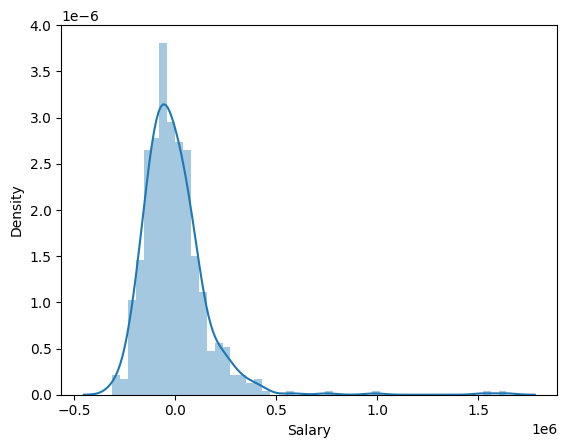

In [94]:
sns.distplot(diff)
plt.show()

In [95]:
r2 = regressor_opt.score(x_test, y_test)
print('r2: ',r2)

r2:  0.1518909561854731
